In [45]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import pickle

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import time
import matplotlib as mpl
start = time.time()

In [4]:
data = pd.read_csv('Features_gap_pubchemqc.csv')
print (data.columns)
features_names0 = data.columns[0:18]
print (features_names0)
# Check the columns names
X_train, X_test, y_train, y_test = train_test_split(
    data[features_names0].values,
    data['gap'].values
)

# see train shape, overal 133K samples, 
# all samples, train =105K , test =33K 
# with subsampling, train= 25.1K, test = 8.4K
print ("Features train array shape: ",X_train.shape)
print ("Features test array shape: ",X_test.shape)
print ("Heat_capacity train shape: ",y_train.shape)
print ("Heat_capacity test shape:",y_test.shape)

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'Logp', 'TPSA', 'QED', 'gap', 'SMILES'],
      dtype='object')
Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles'],
      dtype='object')
Features train array shape:  (104922, 18)
Fe

In [12]:
# kfolds = KFold(shuffle = True, random_state = 42)
scorer = make_scorer(mean_squared_error, greater_is_better = False)

xgb = XGBRegressor(objective = 'reg:squarederror')
param_grid = {'max_depth': range(3,5),
              'learning_rate': [1e-4, 0.001, 0.01, 0.1, 1],
              'n_estimators': range(500, 501),
              'subsample': [0.7]}
xgb = RandomizedSearchCV(xgb, param_grid, n_iter = 100,
                         cv = 3, scoring = scorer, refit = True,
                         n_jobs = 2, verbose = 2)
xgb.fit(X_train, y_train)
best_params = xgb.best_params_

xgb = XGBRegressor(objective = 'reg:squarederror',
                   n_jobs = 10)
xgb.set_params(**best_params)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)
plt.savefig("xgboost.png")
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def mAPE(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true))

print ("r2_score: ",r2_score(y_test, y_pred))
print ("Mean of Cv_test: ",np.mean(y_test))
print ("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print ("Mean Squared Error train: ", mean_squared_error(y_train, y_pred_train))
print ("test r-square: ", r2_score ( y_test, y_pred))
print ("train r-square: ", r2_score (y_train, y_pred_train))
print ("MSE/Mean_Cv_test: ", mean_squared_error(y_test, y_pred)/np.mean(y_test))
print ("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print ("Mean_absolute_error/Mean_Cv_test: ",mean_absolute_error(y_test, y_pred)/np.mean(y_test)) 
print ("MeanAbsolutePercentage error (MAPE): ",MAPE(y_test, y_pred))
print ("MedianAbsolutePercentage error (MdAPE): ",mAPE(y_test, y_pred))
end = time.time()
print ("time: ",end-start)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=500, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=500, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.0001, max_depth=3, n_estimators=500, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=500, subsample=0.7; total time=   4.0s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=500, subsample=0.7; total time=   3.9s
[CV] END learning_rate=0.0001, max_depth=4, n_estimators=500, subsample=0.7; total time=   3.9s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.7; total time=   3.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=500, subsample=0.7; to

<Figure size 640x480 with 0 Axes>

MAE test:  0.5317109098643004
MAE train:  0.47548574070842714


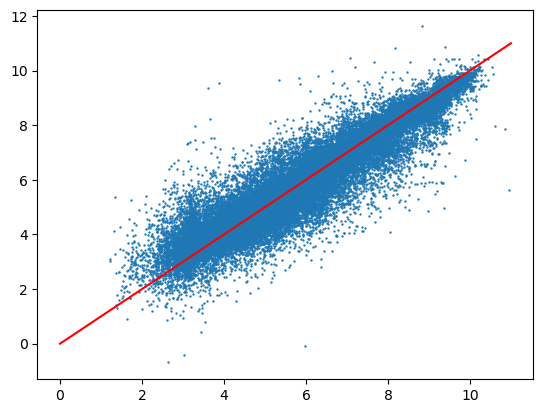

In [14]:
plt.scatter(y_test, y_pred, s=0.5)
plt.plot ([0, 11], [0, 11], color='red')
print ('MAE test: ', mean_absolute_error(y_test, y_pred))
print ('MAE train: ', mean_absolute_error(y_train, y_pred_train))

In [31]:
xgbr_final = XGBRegressor(max_depth=4, n_estimators=500, 
                                       gamma=0.001, learning_rate=1, 
                                       subsample=0.7,  min_child_weight=50, 
                                       n_jobs=10, random_state=0)
xgbr_final.fit(X_train, y_train);
predictions = xgbr_final.predict(X_test)
r_squared_test = r2_score(y_test, predictions)
print (r_squared_test)
train_predictions = xgbr_final.predict(X_train)
r_squared = r2_score(y_train, train_predictions)
print (r_squared)
importance = list(xgbr_final.feature_importances_)
print (importance)

0.8585842502218836
0.8798230453337098
[0.0054699145, 0.022044728, 0.01066947, 0.0064743655, 0.008126867, 0.039106738, 0.015617924, 0.013484631, 0.5951629, 0.047078986, 0.05712433, 0.123361975, 0.026124425, 0.004450492, 0.007641195, 0.0047199833, 0.008895307, 0.004445819]


In [93]:
features_names0

Index(['MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'NumRadicalElectrons', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles'],
      dtype='object')

In [98]:
features_names = ['Mol.Wt.', 'HeavyAtomCount', 'HeavyAtomMol.Wt.', 'Num.H-Acceptors', 
             'Num.H-Donors', 'Num.Het.atoms', 'Num.Rot.Bonds', 'NumVal.Elec.',  
             'Num.Arom.Rings', 'Num.Sat.Rings', 'Num.Aliph.Rings', 'Num.Rad.Elect.', 
             'Num.Aliph.Carbocyc.', 'Num.Aliph.Het.cyc.', 'Num.Arom.Carbocyc.', 
             'Num.Arom.Het.cyc.', 'Num.Sat.Carbocyc.', 'Num.Sat.Het.cyc.']

In [99]:
importance_pd = pd.DataFrame({})
importance_pd['features'] = features_names
importance_pd['importance_values'] = np.round(importance, 4)

In [100]:
importance_pd.sort_values(by='importance_values', ascending=False)

,features,importance_values
8,Num.Arom.Rings,0.5952
11,Num.Rad.Elect.,0.1234
10,Num.Aliph.Rings,0.0571
9,Num.Sat.Rings,0.0471
5,Num.Het.atoms,0.0391
12,Num.Aliph.Carbocyc.,0.0261
1,HeavyAtomCount,0.0220
6,Num.Rot.Bonds,0.0156
7,NumVal.Elec.,0.0135
2,HeavyAtomMol.Wt.,0.0107


<Axes: >

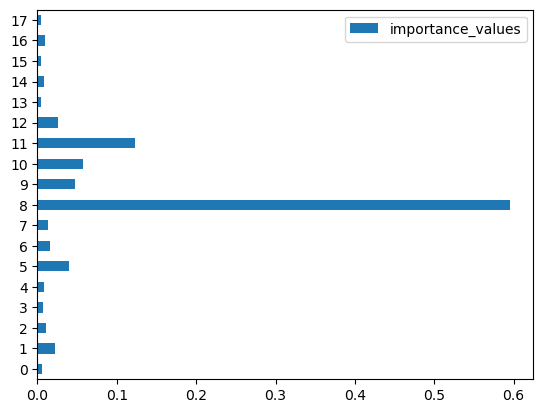

In [43]:
importance_pd.plot(kind='barh')

In [51]:
importance_pd

,features,importance_values
0,MolWt,0.0055
1,HeavyAtomCount,0.0220
2,HeavyAtomMolWt,0.0107
3,NumHAcceptors,0.0065
4,NumHDonors,0.0081
5,NumHeteroatoms,0.0391
6,NumRotatableBonds,0.0156
7,NumValenceElectrons,0.0135
8,NumAromaticRings,0.5952
9,NumSaturatedRings,0.0471


In [52]:
XX = pd.Series(np.round (importance, 4), index=features_names)
XX

MolWt                       0.0055
HeavyAtomCount              0.0220
HeavyAtomMolWt              0.0107
NumHAcceptors               0.0065
NumHDonors                  0.0081
NumHeteroatoms              0.0391
NumRotatableBonds           0.0156
NumValenceElectrons         0.0135
NumAromaticRings            0.5952
NumSaturatedRings           0.0471
NumAliphaticRings           0.0571
NumRadicalElectrons         0.1234
NumAliphaticCarbocycles     0.0261
NumAliphaticHeterocycles    0.0045
NumAromaticCarbocycles      0.0076
NumAromaticHeterocycles     0.0047
NumSaturatedCarbocycles     0.0089
NumSaturatedHeterocycles    0.0044
dtype: float32

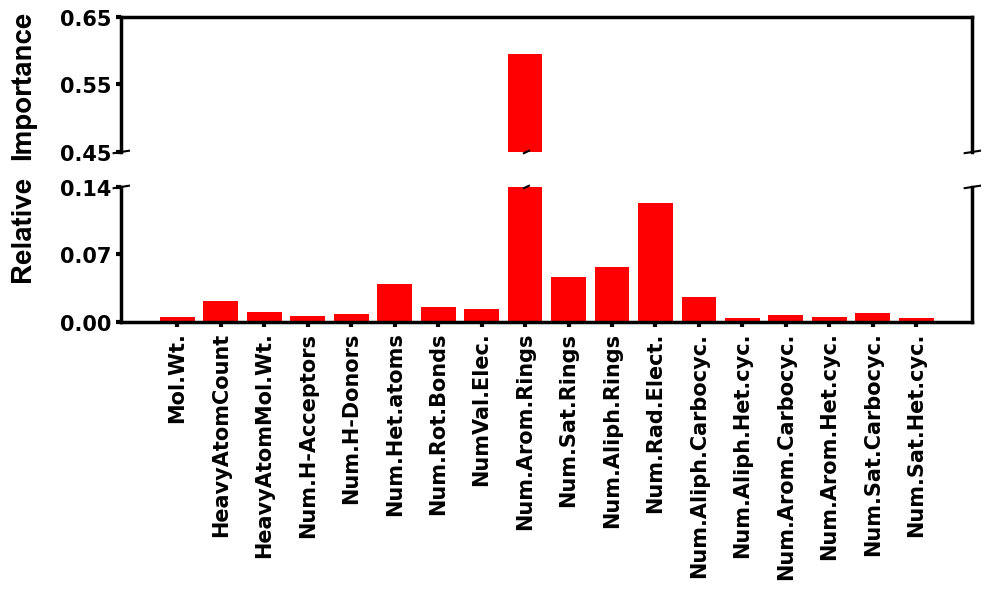

In [131]:
XX = pd.Series(np.round (importance, 4), index=features_names)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10,6))

mpl.rcParams['axes.linewidth'] = 2.5
XX2 = np.around(XX.values, decimals=5)

ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

plt.rcParams["figure.autolayout"] = True
bs = 0.14
ts = 0.45
ax2.set_ylim(0,bs)
ax1.set_ylim(ts, 0.6)

bars1 = ax1.bar(XX.index, XX2, color='red')
plt.sca(ax1)
plt.yticks(rotation=0, fontsize=15, fontweight='bold',)
plt.yticks(np.linspace(ts, 0.65, 3))
ax1.xaxis.set_tick_params(width=3)
ax1.yaxis.set_tick_params(width=3)
#plt.legend(["QM9"], rotation=90,fontsize=15)

bars2 = ax2.bar(XX.index, XX2, color='red')
plt.sca(ax2)
plt.xticks(rotation=90, fontweight='bold', fontsize=15)
plt.yticks(rotation=0, fontweight='bold', fontsize=15)

plt.yticks(np.linspace(0, bs, 3))
ax2.xaxis.set_tick_params(width=3)
ax2.yaxis.set_tick_params(width=3)
ax1.set_ylabel('Importance', fontweight='bold', fontsize=20, fontname='Arial')
ax2.set_ylabel('Relative', fontweight='bold', fontsize=20, fontname='Arial')
ax1.yaxis.set_label_coords(-0.1, 0.5)
ax2.yaxis.set_label_coords(-0.1, 0.7)
"""
for tick in ax2.get_xticklabels():
    tick.set_rotation(-45, fontsize=15)
"""
d = .009
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-3*d, posx+10*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx-3*d, posx+10*d), (- d, + d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())

plt.tight_layout()
plt.savefig('last_features.jpeg', bbox_inches='tight', dpi=500)